In [1]:
#Import Dependacy
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [4]:
#Import Python
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflecting tables
Base = automap_base()

Base.prepare(engine, reflect=True)

#Setting keys
Base.classes.keys()

['measurement', 'station']

In [8]:
# Referencing tables
Measurement = Base.classes.measurement
Station = Base.classes.station

session = Session(engine)

In [9]:
# Inspector
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
#Defining Colums
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Query recent dates
start_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
start_date

('2017-08-23')

In [12]:
# Querying last 12 months
precipitation_12 = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= '2016-08-24').filter(Measurement.date <= '2017-08-23').order_by(Measurement.date).all()

#Display
precipitation_12

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [13]:
# Saving as Panda DF
precipitation_12_df = pd.DataFrame(precipitation_12, columns=['date', 'precipitation'])
precipitation_12_df.set_index('date')
precipitation_12_df.sort_values(by=['date'])
precipitation_12_df.head()

,date,precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [15]:
#Dataframe Description
precipitation_12_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


<IPython.core.display.Javascript object>


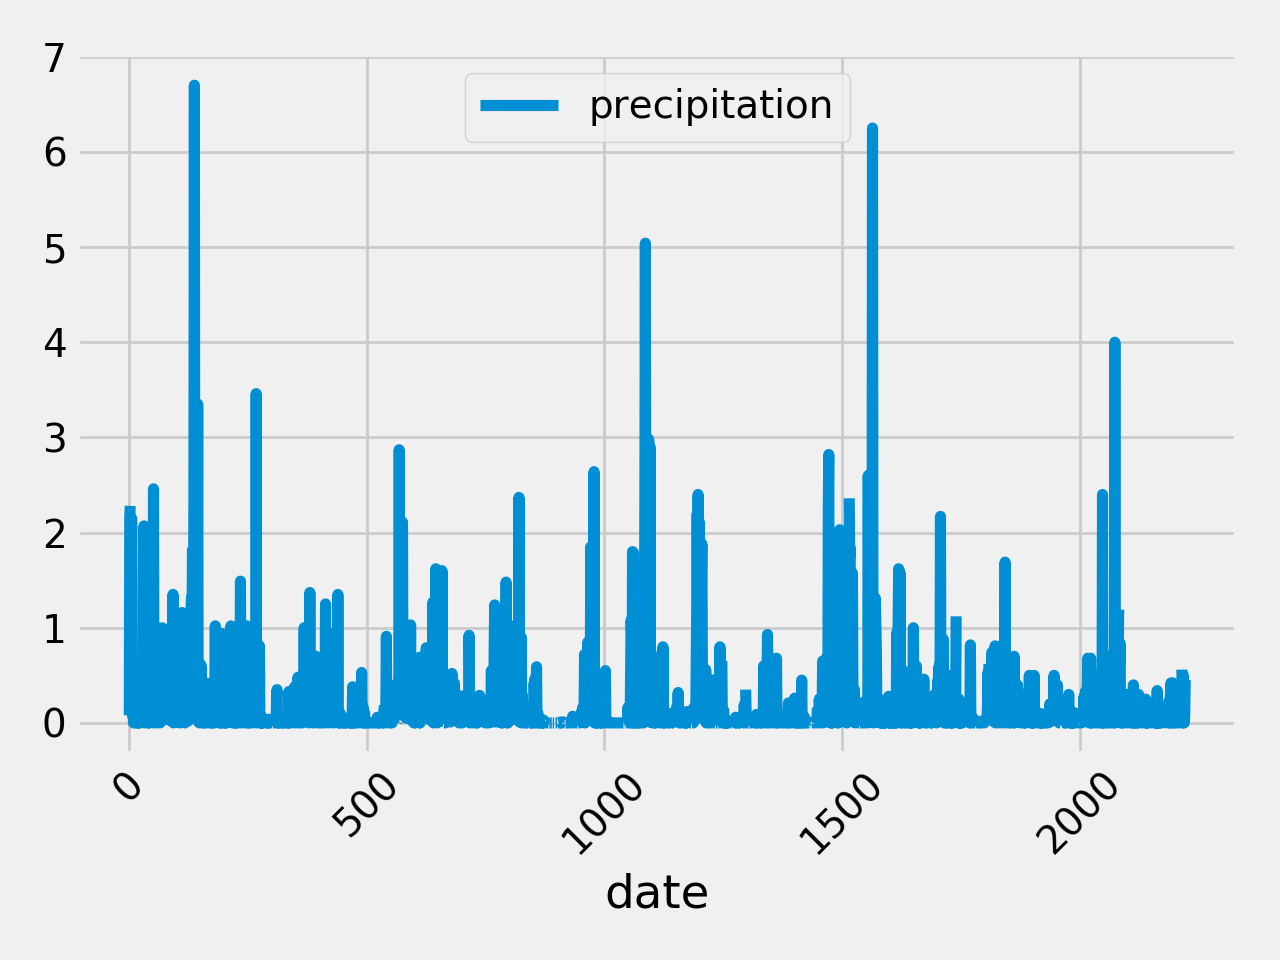

In [18]:
#Plotting DF
precipitation_12_df.plot(x_compat=True)

plt.xlabel("date")
plt.xticks(rotation='45')
plt.tight_layout()
plt.show()

In [19]:
#Station Count
station_count = session.query(Station.id).count()
station_count

9

In [20]:
# Station Query for most active
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
#Finding Avg, Max and Min for Most active station
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

<IPython.core.display.Javascript object>


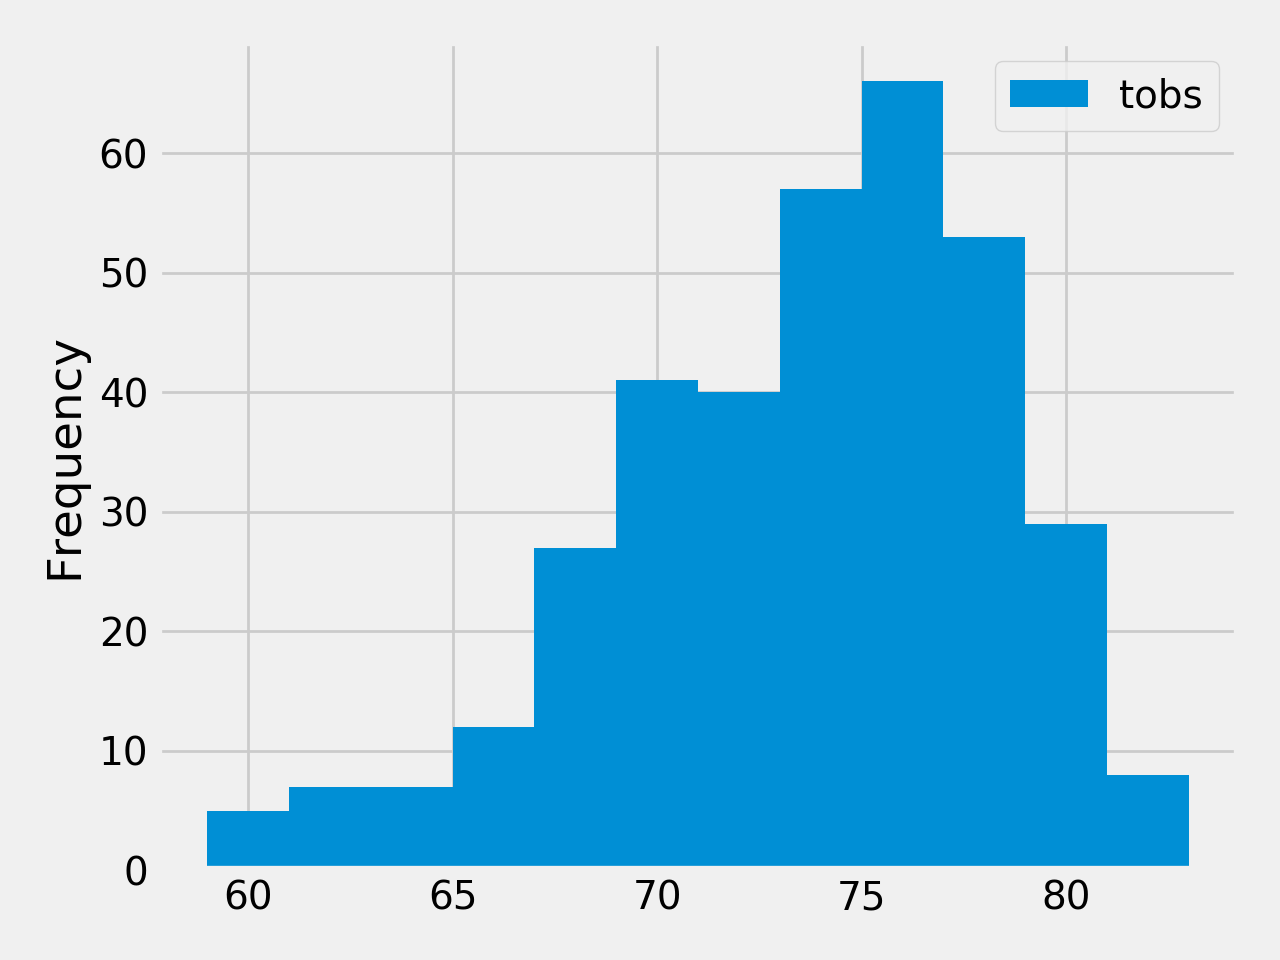

<function matplotlib.pyplot.show(*args, **kw)>

In [22]:
# Querying the most active station past 12 months
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= '2016-08-23').all()

# Plotting the most active station
station_high_temp_obs = pd.DataFrame(results, columns=['tobs'])
station_high_temp_obs.plot.hist(bins=12)
plt.tight_layout()
plt.show